# Loan Prediction Problem
A Finance company wants to automate the loan eligibility process based on the customer details provided while filling application form. These details are Gender,Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [183]:
# Data loading 
train_df = pd.read_excel("D:/Studying/ML-Loan prediction/train_u6lujuX_CVtuZ9i.xlsx")
test_df = pd.read_excel("D:/Studying\ML-Loan prediction/test_Y3wMUE5_7gLdaTN.xlsx")

In [184]:
## copy original datasets 
train_original = train_df.copy()
test_original = test_df.copy()

In [185]:
train_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [186]:
test_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [187]:
## 1. Data Exploration
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [188]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [189]:
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:title={'center':'Loan Status'}>

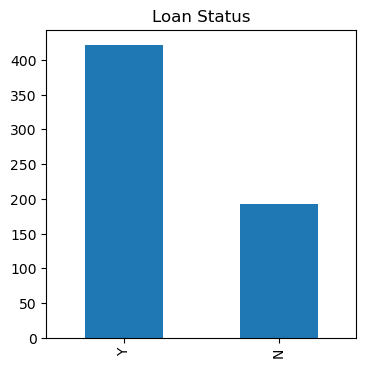

In [190]:
train_df['Loan_Status'].value_counts().plot.bar(figsize = (4,4), title='Loan Status')

the loan of 422(around 69%) people out of 614 was approved

<AxesSubplot:title={'center':'Credit History'}>

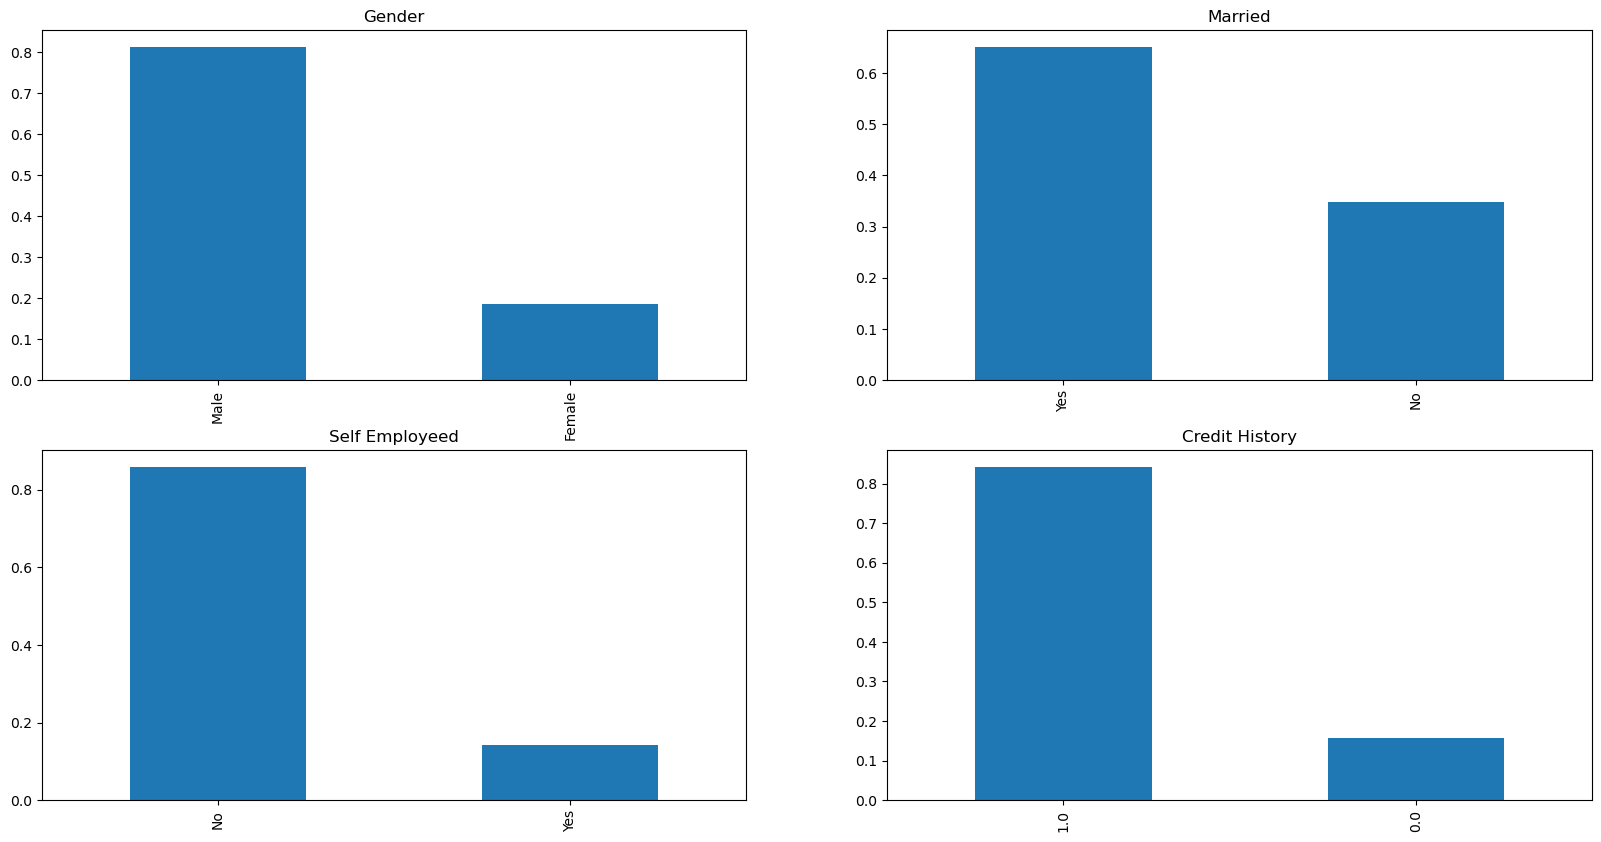

In [191]:
## visualization for Gender, Marriage, Employement, Credit history
plt.figure(1)
plt.subplot(221)
train_df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title="Gender")
plt.subplot(222)
train_df['Married'].value_counts(normalize=True).plot.bar(title = 'Married')
plt.subplot(223)
train_df['Self_Employed'].value_counts(normalize=True).plot.bar(title = 'Self Employeed')
plt.subplot(224)
train_df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')


80% applications in the train dataset are male
around 65% applicants are married
around 15% applicants in the datasets are self-employeed
around 85% applicants have repaid their debts

<AxesSubplot:title={'center':'Property Area'}>

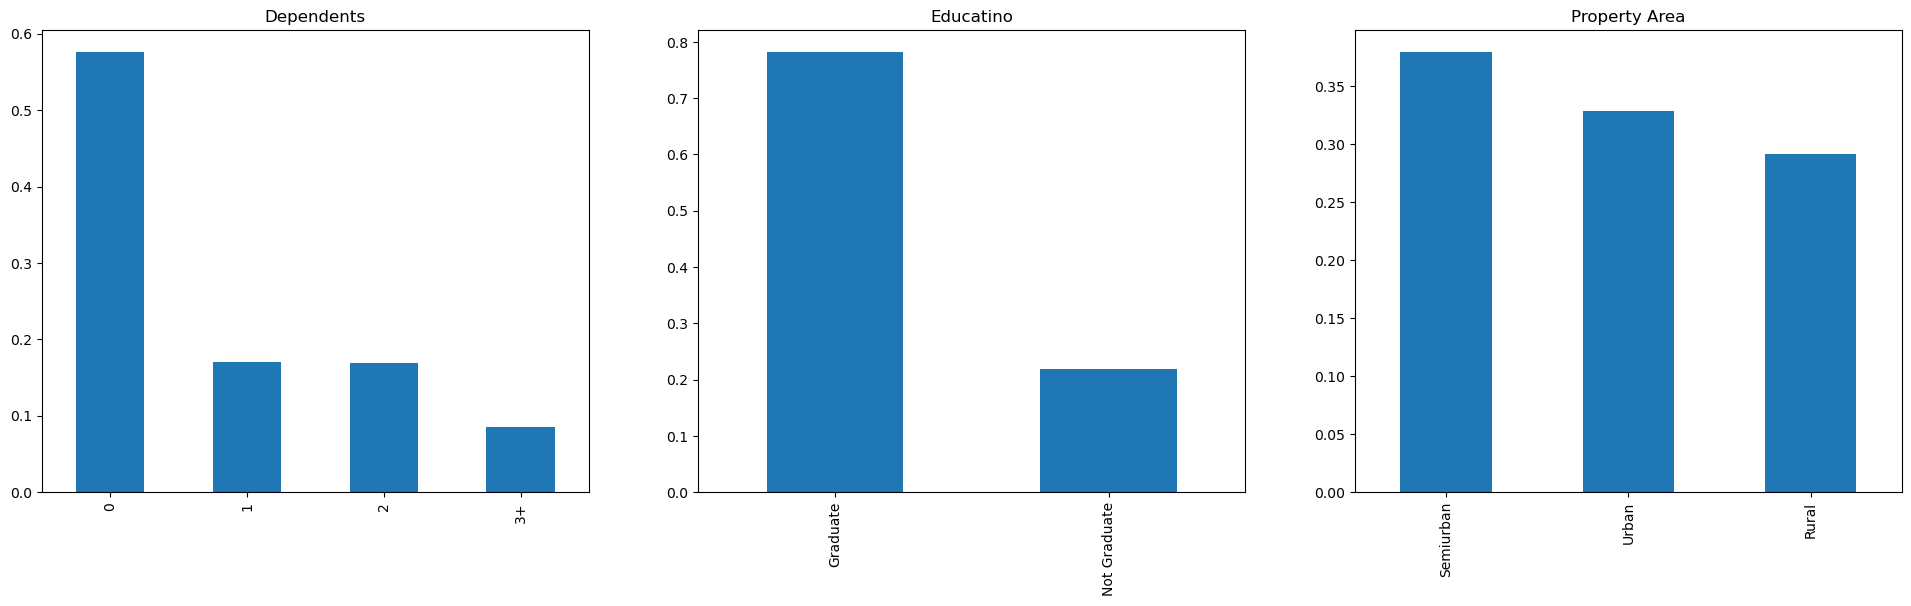

In [192]:
## visualization for Dependents, Education & Property Area
plt.figure(1)
plt.subplot(131)
train_df['Dependents'].value_counts(normalize=True).plot.bar(figsize = (24,6), title = 'Dependents')
plt.subplot(132)
train_df['Education'].value_counts(normalize=True).plot.bar(title = 'Educatino')
plt.subplot(133)
train_df['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')

Most of the applicants don't have dependents
around 80% applicants are graduate
most of the applicants are from Semiurban area

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

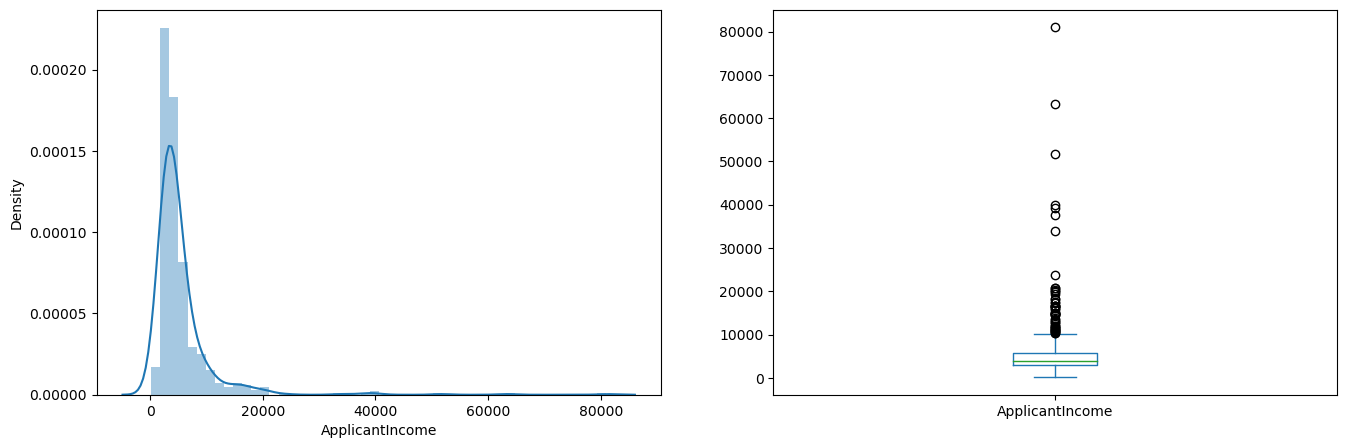

In [193]:
## Visualization for income
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['ApplicantIncome'])
plt.subplot(122)
train_df['ApplicantIncome'].plot.box(figsize = (16,5))

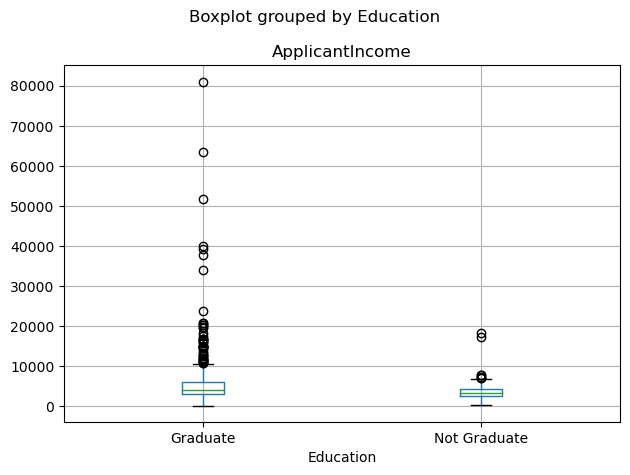

In [194]:
## Visualization applicant income group by education
train_df.boxplot(column='ApplicantIncome', by='Education')
plt.tight_layout()

there are higher number of graduates with very high income which are appearing to be outliers

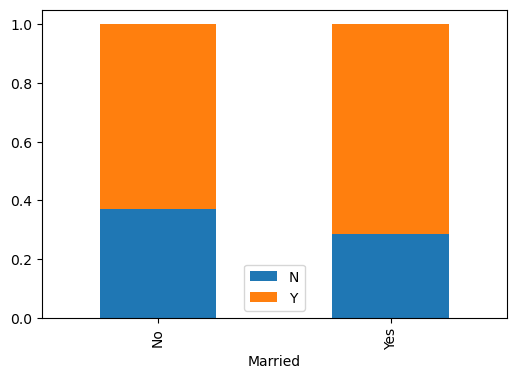

In [195]:
## Visualization for Marriage and loan status
Married = pd.crosstab(train_df['Married'], train_df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked=True, figsize = (6,4))
plt.legend(loc = 'best')


Proportion of married applicants is higher for the approved loans

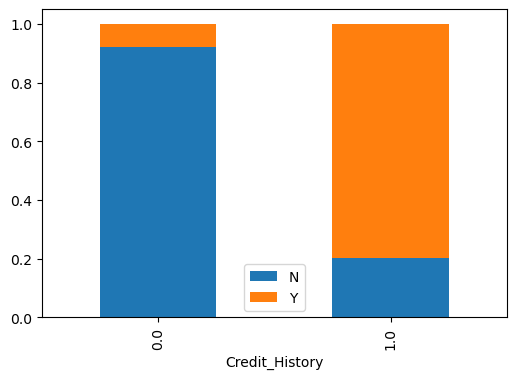

In [196]:
## Visualization for credit history and loan status
Credit_history = pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'])
Credit_history.div(Credit_history.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (6,4))
plt.legend(loc = 'best')

Applicants who's credit history as 1 are more likely to get loan approval

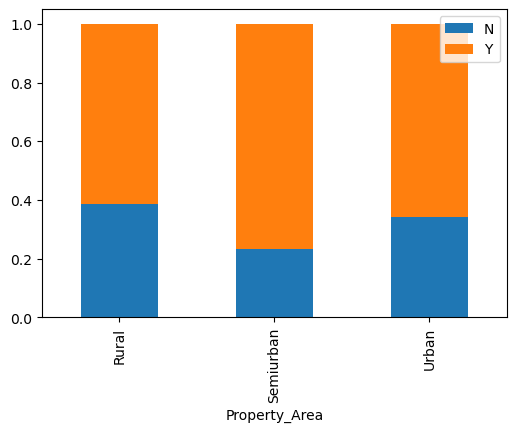

In [197]:
## Visualization for loan status by property area
Property_area = pd.crosstab(train_df['Property_Area'], train_df['Loan_Status'])
Property_area.div(Property_area.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (6,4))
plt.legend(loc='best')

Proportio of loans getting approved in semiurban area is higher compared to rural and urban area

In [198]:
## calculate family income and segment income level 
train_df['family_income'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
bins=[0, 2500, 4000, 6000, 81000]
group = ['low', 'average', 'high', 'very high']
train_df['family_income_bin'] = pd.cut(train_df['family_income'], bins, labels=group)
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,family_income,family_income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,high
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,very high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,high
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,high
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,very high
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,very high


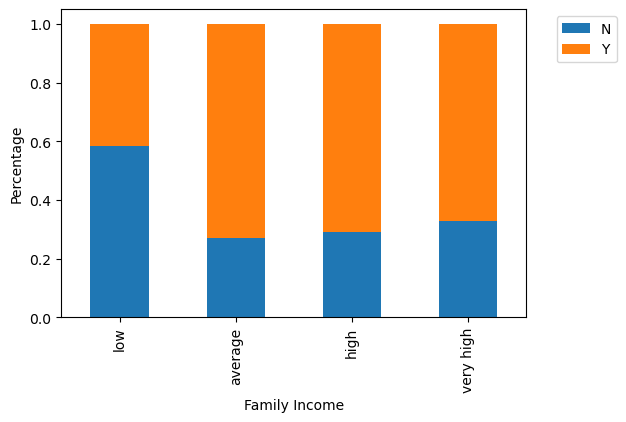

In [199]:
family_income_bin = pd.crosstab(train_df['family_income_bin'], train_df['Loan_Status'])
family_income_bin.div(family_income_bin.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked=True, figsize = (6,4))
plt.xlabel('Family Income')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor = (1.05,1.0), loc='best')

The applicants who have low family income has much lower proportion to get loan approvals than the applicants who has average, high and very high income.

In [200]:
train_df.columns
train_df = train_df.drop(['family_income_bin','family_income'], axis=1)

In [201]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [202]:
train_df['Dependents'].replace('3+', 3, inplace=True)
test_df['Dependents'].replace('3+', 3, inplace = True)
train_df['Loan_Status'].replace('N', 0, inplace=True)
train_df['Loan_Status'].replace('Y', 1, inplace = True)

In [203]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


<AxesSubplot:>

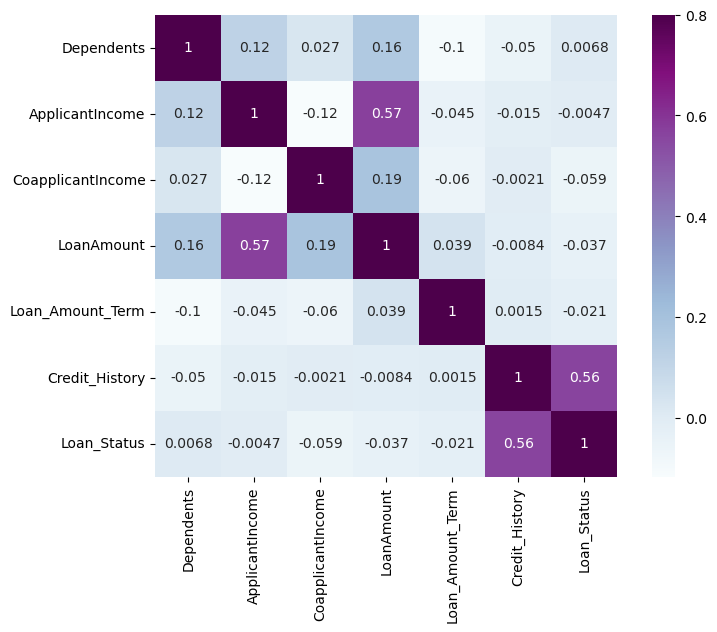

In [204]:
## Visulization for correlation
plt.figure(figsize = (9,6))
sns.heatmap(train_df.corr(), vmax=0.8, square=True, cmap='BuPu', annot=True)

the most correlated variables are (Applicantincome - LoanAmount) and (Credit_History - Loan_Status)

In [205]:
## 2.Data Cleaning
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [206]:
# drop the null value
train_df.dropna(subset=['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History'], inplace=True)

In [207]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [208]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [209]:
## drop the null value of test dataset
test_df.dropna(subset=['Gender', 'Dependents', 'Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History'], inplace=True)

In [210]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [211]:
train_original = train_df.copy()
test_original = test_df.copy()

In [212]:
## 3.Model Building
### Part 1: Logistic model 
    # drop loan_id variable as it does not have any effect on the loan status
train_df=train_df.drop('Loan_ID', axis=1)
test_df = test_df.drop('Loan_ID', axis=1)
    #feature variables to X, and target variables(loan status) to Y
X = train_df.drop('Loan_Status', 1)
Y = train_df['Loan_Status']

C:\Users\Bessie Xu\AppData\Local\Temp\ipykernel_18500\361578178.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train_df.drop('Loan_Status', 1)


In [213]:
    # make dummy variables for the categorical variables 
    # (The dummy variable turns categorical variables into a series of 0 and 1, making them a lot easier to quantify and compare)
X=pd.get_dummies(X)
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [214]:
    #train-test-split is performed
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, Y, test_size=0.4)

In [215]:
    #import logisticregression and accuracy_score from sklearn and fit the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

LogisticRegression()

In [216]:
pred_cv = logistic_model.predict(X_cv)
accuracy_score(y_cv, pred_cv)

0.7708333333333334

Logistic regression model predictions are 77% accurate. 
i.e. we have identified 77% of the loan status correctly

In [217]:
### Part 2； Decision Tree
    # import model function
from sklearn.tree import DecisionTreeClassifier
decisiontree_model = DecisionTreeClassifier(random_state=1)
decisiontree_model.fit(X_train, y_train)

decisiontree_pred_cv = decisiontree_model.predict(X_cv)
    # import accuracy function
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_cv, decisiontree_pred_cv))

              precision    recall  f1-score   support

           0       0.44      0.53      0.48        62
           1       0.75      0.68      0.71       130

    accuracy                           0.63       192
   macro avg       0.60      0.60      0.60       192
weighted avg       0.65      0.63      0.64       192



In [218]:
accuracy_score(y_cv, decisiontree_pred_cv)

0.6302083333333334

Decision tree model predictions are 63% accurate. 
i.e. we have identified 63% of the loan status correctly

In [219]:
### Part3: Random Forest model
    # import model function
from sklearn.ensemble import RandomForestClassifier
    # estimator
rf_model = RandomForestClassifier(n_estimators = 500)
    # Prediction
rf_model.fit(X_train, y_train)
rf_prediction = rf_model.predict(X_cv)

    # accuracy
print(accuracy_score(y_cv, rf_prediction))

print(classification_report(y_cv, rf_prediction))

0.7864583333333334
              precision    recall  f1-score   support

           0       0.77      0.48      0.59        62
           1       0.79      0.93      0.86       130

    accuracy                           0.79       192
   macro avg       0.78      0.71      0.72       192
weighted avg       0.78      0.79      0.77       192



Random Forest model predictions are 78.64% accurate, i.e. we have identified 78.64% of the loan status correct.
Above 3 models, random forest model has a litte higher accuracy for the prediction,

In [220]:
   #Predictions for the test dataset
pred_test = rf_model.predict(test_df)
# prepare the submission dataset which include the test dataset id and prediction result
test_df['Loan_Status_logistic'] = pred_test
#convert the predictions 0/1 to Y/N
test_df['Loan_Status_logistic'].replace(0,'N',inplace=True)
test_df['Loan_Status_logistic'].replace(1,'Y', inplace=True)
# create new dataset for the test submission
test_original['Loan_Status_logistic'] = test_df['Loan_Status_logistic']

submission_rf = test_original[['Loan_ID', 'Loan_Status_logistic']]
pd.DataFrame(submission_rf).to_excel("D:/Studying/ML-Loan prediction/random_forest.xlsx")